----

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Alexis, completaste todas las tareas del proyecto de forma sobresaliente. Mostraste un manejo excelente de las herramientas de visualización de datos y un dominio sólido en la prueba de hipótesis, lo que le dio gran solidez a tu análisis, planteado además con mucha claridad. Te animo a seguir fortaleciendo estas habilidades, ya que serán fundamentales en proyectos futuros

Éxitos en tu próximo sprint 🚀

*Estado del Proyecto:* **Aprobado**

</div>

-----

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_locations = pd.read_csv('/datasets/project_sql_result_04.csv')
df_weather = pd.read_csv('/datasets/project_sql_result_07.csv')

In [3]:
print(df_companies.info())
print(df_companies.head())
print(df_companies.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
company_name    0
trips_amount    0
dtype: int64


In [4]:
print(df_locations.info())
print(df_locations.head())
print(df_locations.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
dropoff_location_name    0
average_trips            0
dtype: int64


In [5]:
print(df_weather.info())
print(df_weather.head())
print(df_weather.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


In [6]:
df_weather['start_ts'] = pd.to_datetime(df_weather['start_ts'])
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


In [7]:
top_locations = df_locations.sort_values(by = 'average_trips', ascending = False).head(10)
print(top_locations)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


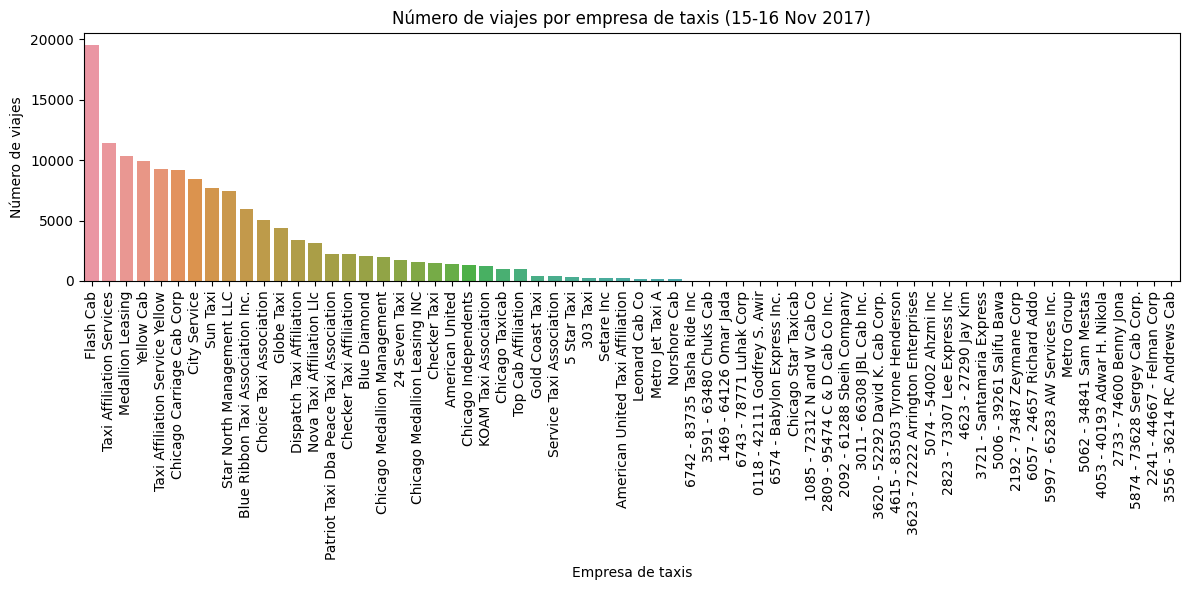

In [8]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_companies.sort_values(by='trips_amount', ascending=False), 
            x='company_name', y='trips_amount')
plt.xticks(rotation=90)
plt.title('Número de viajes por empresa de taxis (15-16 Nov 2017)')
plt.xlabel('Empresa de taxis')
plt.ylabel('Número de viajes')
plt.tight_layout()
plt.show()

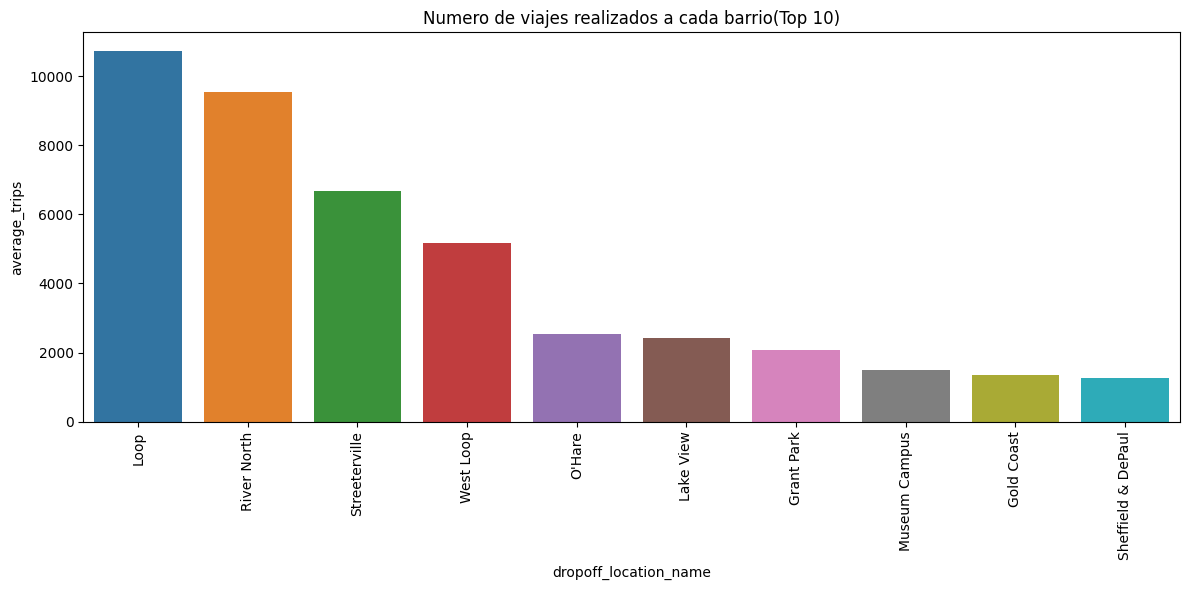

In [9]:
plt.figure(figsize=(12,6))
sns.barplot(data = top_locations, 
            x='dropoff_location_name', y='average_trips')
plt.xticks(rotation=90)
plt.title('Numero de viajes realizados a cada barrio(Top 10)')
plt.xlabel('dropoff_location_name')
plt.ylabel('average_trips')
plt.tight_layout()
plt.show()

La empresa de Taxis que realizó más viajes fue la empresa Flash Cab, seguido de Taxi Affilation Service y Medallion Leasing, esta diferencia en el numero de viajes podria deverse a varias razones, como el numero de taxis con el que cuenta cada compañia o estar relacionada a las calificaciones del publico que tiene cada empresa, o los costos de viaje de cada compañia, sin embargo se requieren de mas datos para determinar esto. El mayor numero de viajes fueron realizados al barrio de Loop, seguido de River North, Streeterville y West Loop, en ese orden, esto podria verse influenciado por el tamaño y poblacion de cada barrio o al nivel socioeconomico medio de cada barrio

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Alexis has planteado posibles explicaciones interesantes para las diferencias en la cantidad de viajes entre compañías de taxis, considerando factores operativos y de percepción del cliente que podrían influir en estos resultados. También haces un buen intento por vincular la concentración de viajes en ciertos barrios con características demográficas o económicas, lo cual abre la puerta a análisis más profundos sobre la demanda por zona.

</div>

In [10]:
df_weather['day_of_week'] = df_weather['start_ts'].dt.day_name()
df_weather['is_rainy_saturday'] = ((df_weather['day_of_week'] == 'Saturday') & 
                                   (df_weather['weather_conditions'].str.contains('Bad', case=False)))

# Separar los datos
rainy_saturdays = df_weather[df_weather['is_rainy_saturday']]['duration_seconds']
other_days = df_weather[~df_weather['is_rainy_saturday']]['duration_seconds']

In [11]:
print(df_weather[df_weather['day_of_week'] == 'Saturday']['weather_conditions'].unique())
print(df_weather['weather_conditions'].unique())


['Good' 'Bad']
['Good' 'Bad']


In [12]:
alpha = 0.05

results = st.ttest_ind(rainy_saturdays, other_days, equal_var= False)

print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 6.738994326108734e-12
Rechazamos la hipótesis nula


In [13]:
print(rainy_saturdays.mean())

2427.2055555555557


In [14]:
print(other_days.mean())

1999.6756756756756


Se rechazó la hipotesis nula, lo que indica que si hay una diferencia significativa en el tiempo que toma el recorrido al aeropuerto en sabados lluviosos, en promedio, en los sabados lluviosos toma 2427 segundo el llegar hasta el aeropuerto, mientras cualquier otro dia toma en promedio 1999.6 segudos, lo que representa un retrazo en el tiempo de viaje los sabados lluviosos, sin embargo, podria ser util comparar si hay una diferencia en el tiempo promedio de viaje entre otros dias lluviosos o dias lluviosos vs dia soleado